In [17]:
from ase.calculators.lj import LennardJones
from ase import Atoms

molecule1 = Atoms('Ar', positions=[[0, 0, 0]])
molecule2 = Atoms('Ar', positions=[[3, 0, 0]])

system = molecule1 + molecule2

sigma = 3.4  # Å, distance where potential is zero
epsilon = 1.103  # eV, depth of potential well
lj_calculator = LennardJones(sigma=sigma, epsilon=epsilon)

system.calc = lj_calculator

lj_energy = system.get_potential_energy()

print(f"Lennard-Jones Potential Energy: {lj_energy:.4f} eV")

Lennard-Jones Potential Energy: 10.4687 eV


In [9]:
import numpy as np

positions = system.get_positions() 
distance = np.linalg.norm(positions[1] - positions[0]) 
print(f"Distance between atoms: {distance:.2f} Å")

Distance between atoms: 3.00 Å


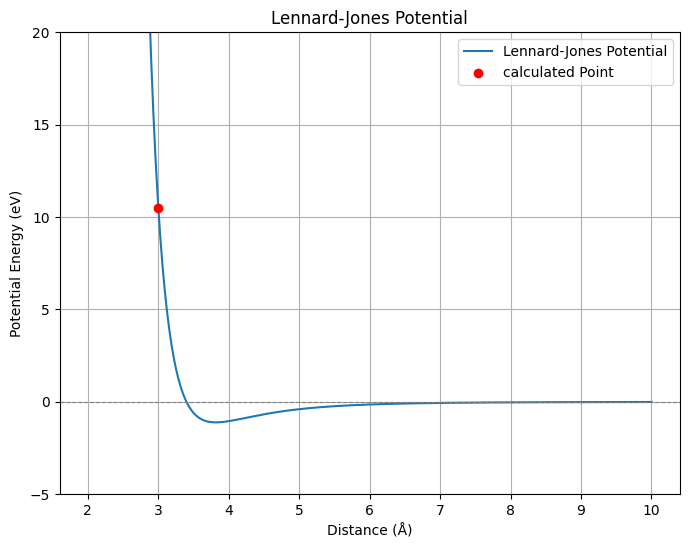

In [30]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 3.4  # Å
epsilon = 1.1103  # eV

def lennard_jones_potential(r, sigma, epsilon):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

distances = np.linspace(2, 10, 500) 
lj_energies = lennard_jones_potential(distances, sigma, epsilon)
# print(lj_energies)

plt.figure(figsize=(8, 6))
plt.plot(distances, lj_energies, label="Lennard-Jones Potential")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Lennard-Jones Potential")
plt.xlabel("Distance (Å)")
plt.ylabel("Potential Energy (eV)")
plt.legend()
plt.grid()
plt.ylim(-5.0, 20) 

plt.scatter([distance], [lj_energy], color="red", label="calculated Point", zorder=5)
plt.legend() 
plt.show()